In [340]:
import scipy.integrate
import numpy
import matplotlib.pyplot
import os
import json
import scipy.interpolate
#for partial specialization
import cModel
import importlib
importlib.reload(cModel)
import time
import ivp
importlib.reload(ivp)
import runSolver
importlib.reload(runSolver)

  
#run solver
fh=os.path.expanduser('~')
i=4
#jobDir=os.path.join(fh,'temp','humanHG')
jobDir=os.path.join(fh,'temp','humanHG_withHairPC')
#modelFile=os.path.join(fh,'software','src','PBPK','models','humanHGplusI.json')
#parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHGplusI_parameters.json')
modelFile=os.path.join(fh,'software','src','PBPK','models','humanHG_withHairPC.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_withHairPC_parameters.json')
#modelFile=os.path.join(fh,'software','src','PBPK','models','humanHG.json')
#parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_parameters1.json')
if i>0: 
    targetDir=jobDir+'{}'.format(i)
else:
    targetDir=jobDir
if i==1:
    srcDir=jobDir
if i>1:
    srcDir=jobDir+'{}'.format(i-1)

code=''
if i>0:
    code='{}'.format(i+1)
setupFile=os.path.join(fh,'software','src','PBPK','setup','setupFast{}.json'.format(code))

if i>0:
    runSolver.main([setupFile,modelFile,parameterFile],targetDir,srcDir)
else:
    runSolver.main([setupFile,modelFile,parameterFile],targetDir)
setup=runSolver.parseSetup(setupFile)
scale=runSolver.getScale(setup)
tmax=setup['tmax']*scale
#t0,y0,S1,lut,lutSE=runSolver.getStartPoint(setup)


Using /home/studen/temp/humanHG_withHairPC4
Using solution from /home/studen/temp/humanHG_withHairPC3
t0=240.0
At t=245.77
At t=249.01
At t=252.22
At t=255.62
At t=258.70
At t=261.96
At t=265.16
At t=268.43
At t=271.65
At t=274.87
At t=278.28
At t=281.36
At t=284.77
At t=287.86
At t=291.14
At t=294.37
At t=297.60
Done simultaneous LSODA SE
Time: 87.733 s


In [229]:
humanHG=os.path.join(fh,'temp','humanHG')
humanHGplusI=os.path.join(fh,'temp','humanHGplusI')
t,sol,se,sOut,qt,lut,lutSE=runSolver.loadSolutionFromDir(humanHG)
print(len(t))

201


kHScaled
{'redBloodCells': 0, 'plasma': 1, 'venous': 2, 'kidney': 3, 'urine': 4, 'richlyPerfused': 5, 'fat': 6, 'slowlyPerfused': 7, 'hair': 8, 'brainBlood': 9, 'brain': 10, 'liver': 11, 'gut': 12, 'intestine': 13, 'feces': 14, 'inorganicMercury': 15}
2.880781921710105e-08
    0.33    0.019       17 [bodyWeight]
    0.11       15   0.0073 [kRBCScaled]
    0.73  2.2e+02   0.0034 [plasmaVolumeFraction]
  0.0076      1.3    0.006 [redBloodCellsVolumeFraction]
  0.0089   0.0025      3.5 [rbcPC]
    0.38  3.2e+02   0.0012 [kidneyVolumeFraction]
 6.8e-07       24  2.9e-08 [kHScaled]
  0.0066     0.12    0.056 [slowlyPerfusedVolumeFraction]
 0.00085       17  4.9e-05 [kBRScaled]
    0.57  2.7e+02   0.0021 [brainBloodVolumeFraction]
 0.00029    0.049    0.006 [brainVolumeFraction]
 0.00028  0.00032     0.88 [brainPC]
   0.051      7.8   0.0065 [liverVolumeFraction]
 1.2e-06      2.5  4.9e-07 [kBScaled]
 6.6e-05   0.0016    0.042 [intestineVolumeFraction]
 0.00012       24  4.9e-06 [kIScaled]
 

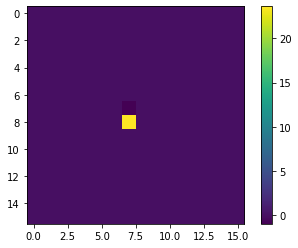

In [378]:
model=cModel.model()
#sys.parse(os.path.join(fh,'software','src','Integra','models','cDiazepam.json'))
setupFile=os.path.join(fh,'software','src','PBPK','setup','setupFastLoad.json')
modelFile=os.path.join(fh,'software','src','PBPK','models','humanHG.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_parameters1.json')
model.parse(modelFile,parameterFile)
setup=runSolver.parseSetup(setupFile)
scale=runSolver.getScale(setup)
tmax=setup['tmax']*scale
jpar=6
SS=model.fSS(1)[jpar]
lutSEi={model.lutSE[x]:x for x in model.lutSE}
print(lutSEi[jpar])
matplotlib.pyplot.imshow(SS)
matplotlib.pyplot.colorbar()
print(model.lut)
w=model.getWeights(model.lutSE)
sqw=numpy.sqrt(w)
print(sqw[jpar])
for p in model.lutSE:
    jp=model.lutSE[p]
    jSS=model.fSS(1)[jp]
    jm=numpy.max(jSS)
    jw=sqw[jp]
    print('{:8.2g} {:8.2g} {:8.2g} [{}]'.format(jm*jw,jm,jw,p))

In [ ]:
model=cModel.model()
fh=os.path.expanduser('~')
#sys.parse(os.path.join(fh,'software','src','Integra','models','cDiazepam.json'))
setupFile=os.path.join(fh,'software','src','PBPK','setup','setupFast.json')
modelFile=os.path.join(fh,'software','src','PBPK','models','humanHGplusI.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHGplusI_parameters.json')
model.parse(modelFile,parameterFile)
setup=runSolver.parseSetup(setupFile)
tscale=runSolver.getScale(setup)

model.inspect()    

***********done************
(16, 16)
22
Time: 0.714 s
[ 0.          0.          0.          0.          0.          0.
  0.          0.12434798 -0.00099998  0.          0.          0.
  0.          0.          0.          0.        ]


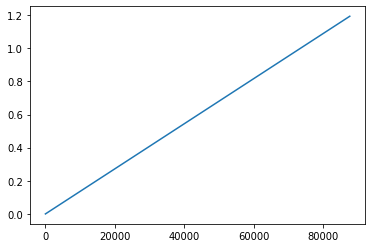

In [58]:
model=cModel.model()
fh=os.path.expanduser('~')
#sys.parse(os.path.join(fh,'software','src','Integra','models','cDiazepam.json'))
setupFile=os.path.join(fh,'software','src','PBPK','setup','setupFast.json')
modelFile=os.path.join(fh,'software','src','PBPK','models','humanHGplusI.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHGplusI_parameters.json')
sys.parse(modelFile,parameterFile)
setup=runSolver.parseSetup(setupFile)
tscale=runSolver.getScale(setup)

sys.inspect()    

print("***********done************")
print(model.M(1).shape)
#print(sys.fSS(2))
print(model.m)

nt=setup['nt']
qtmax=24*60*365*10
qt=numpy.linspace(0,qtmax,nt)
#ft=[fw['derivatives']['fetusGrowthDuration'](x) for x in qt]
try:
    fw=model.get('fetusWeight')
    ft=[fw['value'](x) for x in qt]
    matplotlib.pyplot.plot(qt/tscale,ft)
except (KeyError,TypeError):
    pass

try:
    hw=model.get('hairVolume')
    ht=[10*hw['value'](x) for x in qt]
    matplotlib.pyplot.plot(qt/tscale,ht)
except (KeyError,TypeError):
    pass
start_time=time.time()
for i in range(100000):
    model.M(1e7)
end_time=time.time()
print('Time: {:.3f} s'.format(end_time-start_time))
print(sys.M(1000)[8,:])

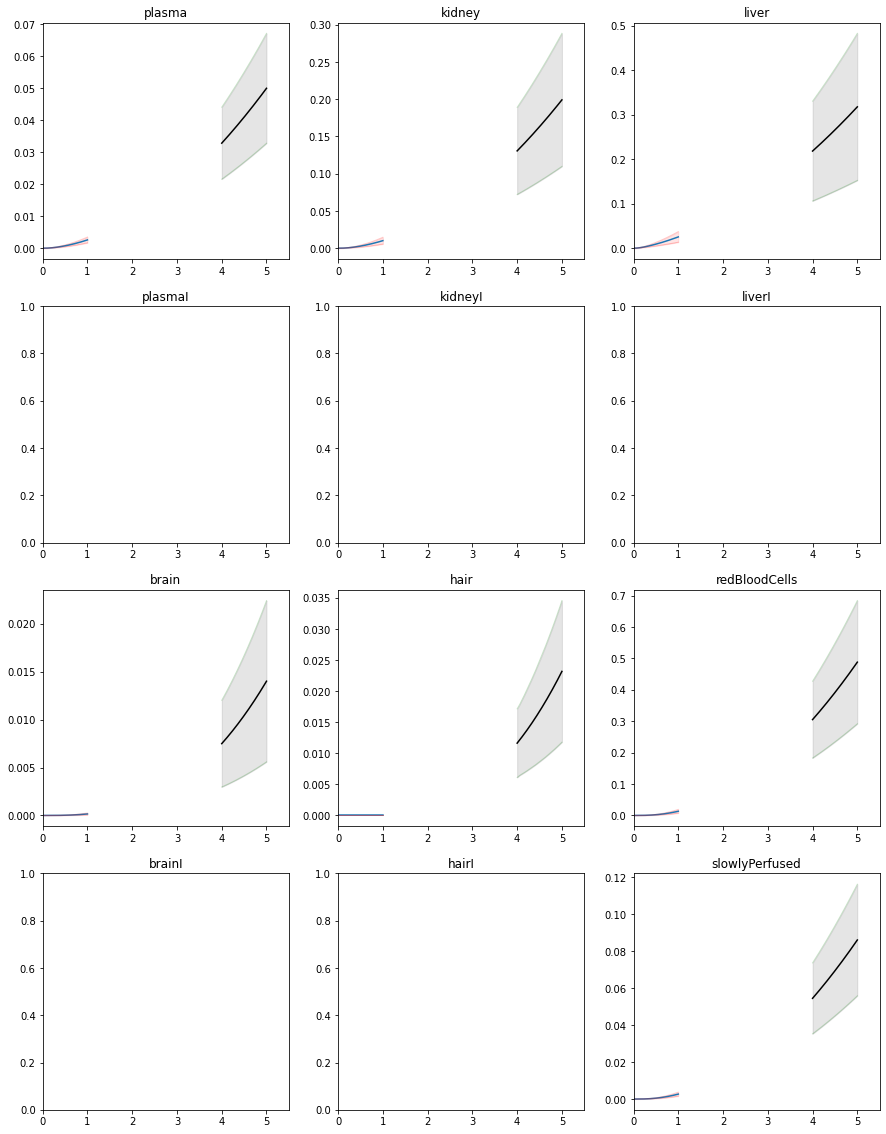

In [341]:
# #copy output of Thompson et al1
# merge solutions 
humanHG=os.path.join(fh,'temp','humanHG')
humanHGplusI=os.path.join(fh,'temp','humanHGplusI')
humanHG_withHairPC=os.path.join(fh,'temp','humanHG_withHairPC1')
t,sol,se,sOut,qt,lut,lutSE=runSolver.loadSolutionFromDir(humanHG)
t1,sol1,se1,sOut1,qt1,lut1,lutSE1=runSolver.loadSolutionFromDir(targetDir)
fig, axs = matplotlib.pyplot.subplots(4, 3,figsize=(15,20))
name=['plasma','kidney','liver',
      'plasmaI','kidneyI','liverI',
      'brain','hair','redBloodCells',
     'brainI','hairI','slowlyPerfused'
      ]

tscale=scale
max=[-1]*len(name)
for i in range(len(name)):
    row=i//3
    col=i%3
    ax=axs[row,col]
    try:
        fy=sol[:,lut[name[i]]]
        fe=se[:,lut[name[i]]]
        ax.plot(t/tscale,fy)
        ax.fill_between(t/tscale, fy-fe, fy + fe, color='red',alpha=0.1)
        ax.plot(t/tscale,fy-fe,color='red',linewidth=1,alpha=0.2)
        ax.plot(t/tscale,fy+fe,color='red',linewidth=1,alpha=0.2)
    except KeyError:
        pass
    try:
        fy1=sol1[:,lut1[name[i]]]
        fe1=se1[:,lut1[name[i]]]
        ax.plot(t1/tscale,fy1,color='black')
        ax.fill_between(t1/tscale, fy1-fe1, fy1 + fe1, color='black',alpha=0.1)
        ax.plot(t1/tscale,fy1-fe1,color='green',linewidth=1,alpha=0.2)
        ax.plot(t1/tscale,fy1+fe1,color='green',linewidth=1,alpha=0.2)
    except (NameError,KeyError):
        pass
    if max[i]>0:
        axs[row,col].set_ylim([0,max[i]])
    axs[row,col].set_xlim([0,1.1*tmax/tscale])
    axs[row,col].set_title(name[i])

In [380]:
model=cModel.model()
#sys.parse(os.path.join(fh,'software','src','Integra','models','cDiazepam.json'))
setupFile=os.path.join(fh,'software','src','PBPK','setup','setupFast.json')
modelFile=os.path.join(fh,'software','src','PBPK','models','humanHG_withHairPC.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_withHairPC_parameters.json')
model.parse(modelFile,parameterFile)
t,sol,se,sOut,qt,lut,lutSE=runSolver.loadSolutionFromDir(targetDir)
compartment='hair'
d=model.getDerivatives(sOut,lut[compartment])
w=model.getWeights(lutSE)
print('Sum ({}, der, sigma_p)'.format(compartment))
s={x:d[lutSE[x]]*w[lutSE[x]] for x in lutSE}
s=dict(sorted(s.items(), key=lambda item:item[1],reverse=True))
for p in list(s)[:10]:
    j=lutSE[p]
    print('\t{:.2g} [{:.2g} {:.2g}] {} '.format(d[j]*w[j],d[j],w[j],p))

Sum (hair, der, sigma_p)
	4.5e-05 [7.5e+04 6e-10] kRScaled 
	3.3e-05 [1.1e-07 3e+02] bodyWeight 
	3.2e-05 [3.9e+10 8.3e-16] kHScaled 
	7.8e-06 [2.3e-05 0.34] slowlyPerfusedPC 
	4.9e-06 [0.0016 0.0031] slowlyPerfusedVolumeFraction 
	1.2e-06 [0.00025 0.0046] liverOutFlowFraction 
	1.1e-06 [5.2e-07 2.2] liverPC 
	7.8e-07 [0.019 4.2e-05] liverVolumeFraction 
	7.3e-07 [5.9e-08 12] rbcPC 
	6.3e-07 [0.018 3.6e-05] redBloodCellsVolumeFraction 


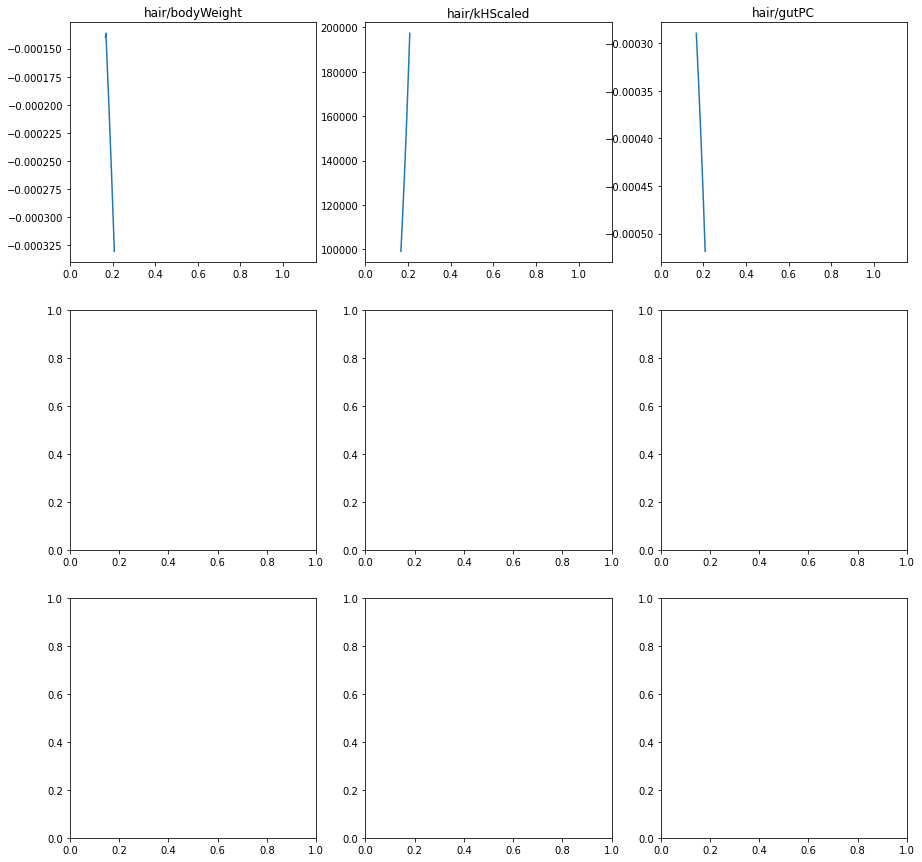

In [382]:
# #copy output of Thompson et al1
# merge solutions 
humanHG=os.path.join(fh,'temp','humanHG')
humanHGplusI=os.path.join(fh,'temp','humanHGplusI')
humanHG_withHairPC=os.path.join(fh,'temp','humanHG_withHairPC')
t,sol,se,sOut,qt,lut,lutSE=runSolver.loadSolutionFromDir(targetDir)
fig, axs = matplotlib.pyplot.subplots(3, 3,figsize=(15,15))
cName=['liverI']
cName=['hair']
pName=['bodyWeight','kHScaled','gutPC']

tscale=scale
max=[-1]*len(name)
for row in range(len(cName)):
    for col in range(len(pName)):
        #row=i//3
        #col=i%3
        try:
            fy=sOut[:,lut[cName[row]],lutSE[pName[col]]]
        except KeyError:
            continue
        ax=axs[row,col]
        ax.plot(qt/tscale,fy)
        #if max[i]>0:
        #    axs[row,col].set_ylim([0,max[i]])
        axs[row,col].set_xlim([0,1.1*tmax/tscale])
        axs[row,col].set_title('{}/{}'.format(cName[row],pName[col]))

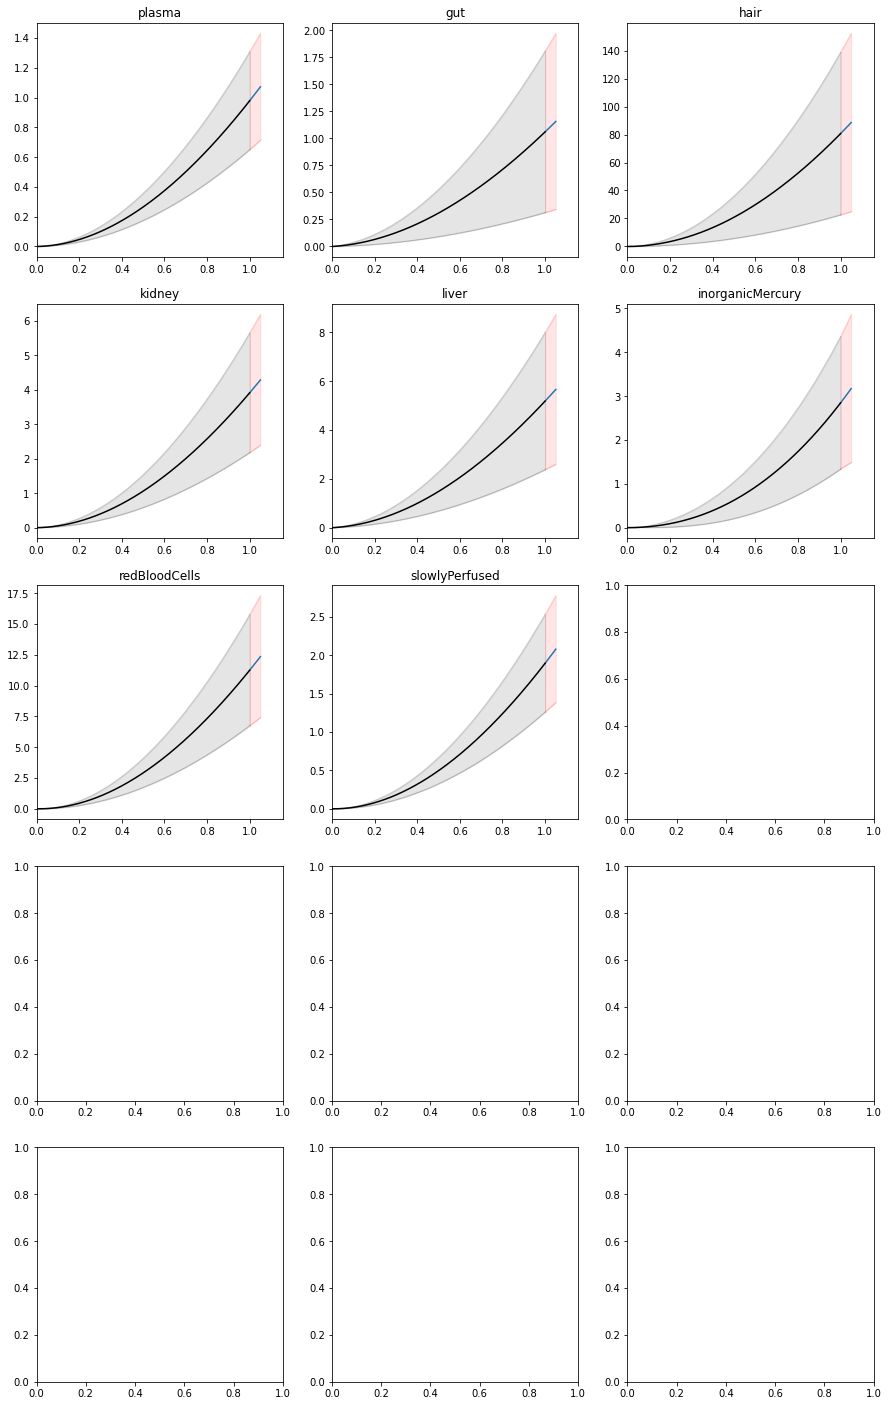

In [95]:
# #copy output of Thompson et al1
# merge solutions 
fig, axs = matplotlib.pyplot.subplots(5, 3,figsize=(15,25))
name=['arterial','adipose','brain','heart','kidney','liver','lung','muscle','skin',
      'splanchnic','stomach','testes','excrement']
name=['plasma','gut','hair','kidney','liver','inorganicMercury','redBloodCells','slowlyPerfused']

#diazepam
max=[1.5,2.6,3,4,5,2.5,6.8,1.5,1.5,4,4.2,3,25]
#cotinine
max=[9]*13
max[12]=90
max[2]=2

tscale=scale
max=[1000*x for x in max]
for i in range(len(name)):
    row=i//3
    col=i%3
    fy=sol[:,model.lut[name[i]]]
    fe=se[:,model.lut[name[i]]]
    fy1=solOld[:,model.lut[name[i]]]
    fe1=seOld[:,model.lut[name[i]]]
    ax=axs[row,col]
    ax.plot(t/tscale,fy)
    ax.plot(tOld/tscale,fy1,color='black')
    ax.fill_between(t/tscale, fy-fe, fy + fe, color='red',alpha=0.1)
    ax.plot(t/tscale,fy-fe,color='red',linewidth=1,alpha=0.2)
    ax.plot(t/tscale,fy+fe,color='red',linewidth=1,alpha=0.2)
    ax.fill_between(tOld/tscale, fy1-fe1, fy1 + fe1, color='black',alpha=0.1)
    ax.plot(tOld/tscale,fy1-fe1,color='black',linewidth=1,alpha=0.2)
    ax.plot(tOld/tscale,fy1+fe1,color='black',linewidth=1,alpha=0.2)
    axs[row,col].set_title(name[i])
    #axs[row,col].set_ylim([0,max[i]])
    axs[row,col].set_xlim([0,1.1*tmax/tscale])


In [ ]:
# #copy output of Thompson et al1
# draw just the errors
fig, axs = matplotlib.pyplot.subplots(3, 3,figsize=(15,25))
name=['arterial','adipose','brain','heart','kidney','liver','lung','muscle','skin',
      'splanchnic','stomach','testes','excrement']
name=['plasma','gut','hair','kidney','liver','inorganicMercury','redBloodCells','slowlyPerfused']

#diazepam
max=[1.5,2.6,3,4,5,2.5,6.8,1.5,1.5,4,4.2,3,25]
#cotinine
max=[9]*13
max[12]=90
max[2]=2

tscale=scale
max=[1000*x for x in max]
for i in range(len(name)):
    row=i//3
    col=i%3
    fe=se[:,model.lut[name[i]]]
    fe1=seOld[:,model.lut[name[i]]]
    ax=axs[row,col]
    ax.plot(t/tscale,fe)
    ax.plot(tOld/tscale,fe1,color='black')
    axs[row,col].set_title(name[i])
    #axs[row,col].set_ylim([0,max[i]])
    axs[row,col].set_xlim([0,1.1*tmax/tscale])


Drawing kHScaled 6/6


ValueError: x and y must have same first dimension, but have shapes (671,) and (1458,)

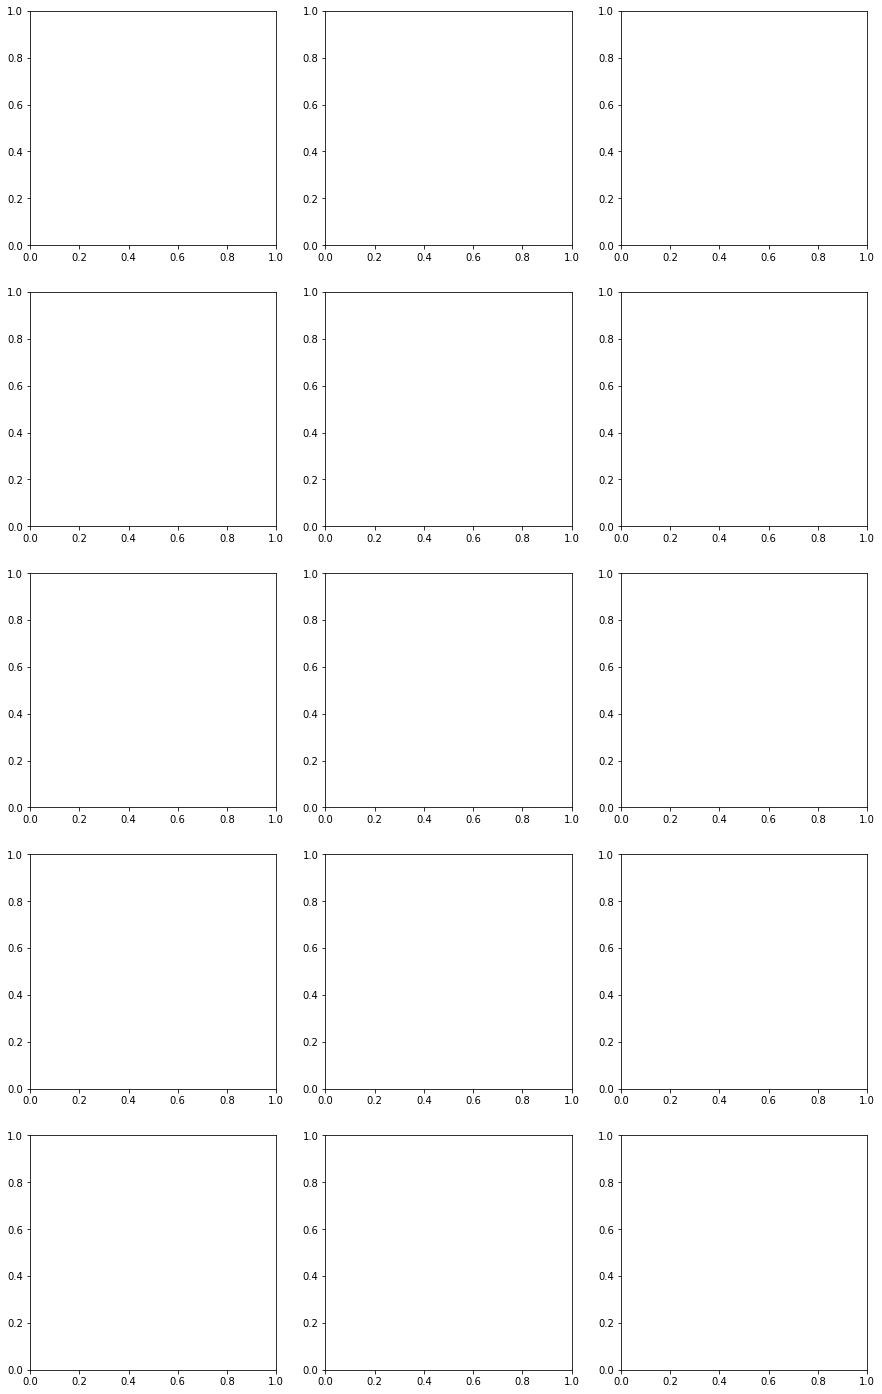

In [120]:
# #copy output of Thompson et al1
#draw error contributions
fig, axs = matplotlib.pyplot.subplots(5, 3,figsize=(15,25))
name=['arterial','adipose','brain','heart','kidney','liver','lung','muscle','skin',
      'splanchnic','stomach','testes','excrement']
name=['plasma','gut','hair','kidney','liver','redBloodCells','slowlyPerfused']

#diazepam
max=[1.5,2.6,3,4,5,2.5,6.8,1.5,1.5,4,4.2,3,25]
#cotinine
max=[9]*13
max[12]=90
max[2]=2

tscale=scale
ipar=6

for nm in model.lutSE:
    if model.lutSE[nm]==ipar:
        parName=nm
print('Drawing {} {}/{}'.format(parName,model.lutSE[parName],lutSE[parName]))
        
max=[1000*x for x in max]
for i in range(len(name)):
    row=i//3
    col=i%3
    fe=s1[:,model.lut[name[i]],model.lutSE[parName]]
    fe1=s1Old[:,lut[name[i]],lutSE[parName]]
    ax=axs[row,col]
    ax.plot(t/tscale,fe)
    ax.plot(qtOld/tscale,fe1,color='black')
    axs[row,col].set_title(name[i])
    #axs[row,col].set_ylim([0,max[i]])
    axs[row,col].set_xlim([0,1.1*tmax/tscale])


7


7440

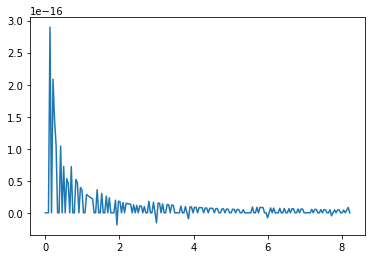

In [25]:
#gD=sys.get("hairGrowthDuration")
#print(gD['value']/60/24/365)
print(model.lut['slowlyPerfused'])
ft=[sys.fSS(x)[0,8,7] for x in qt]
#matplotlib.pyplot.imshow(sys.fSS(3e6)[0])
matplotlib.pyplot.plot(qt/tscale,ft)
30*248